# Import Libraries

In [259]:
import os
os.chdir(r"C:\Users\Kolawat\Desktop\condo_price")

# import data manipulation library
import numpy as np
import pandas as pd

# import data visualization library
import matplotlib.pyplot as plt
import seaborn as sns

# import scientific computing library
import scipy

# import sklearn data preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.pipeline import Pipeline

# import sklearn model class
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

# import sklearn model selection
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score, cross_val_predict, validation_curve
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import RFE

# import sklearn model evaluation regression metrics
from sklearn import metrics
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_error

# Pre processing data

In [260]:
# โหลดชุดข้อมูล
data = pd.read_csv(r"data\df_cleaned_for_ML_regression.csv")

# แสดงข้อมูลเบื้องต้น
data.head()

,name,district,latitude,longitude,year_built,proj_area,nbr_buildings,nbr_floors,units,hospital,...,tran_name1,tran_name2,tran_name3,tran_name4,tran_name5,dist_tran_1,dist_tran_2,dist_tran_3,dist_tran_4,dist_tran_5
0,101 Mansion,Bang Kapi,13.787435,100.631564,1991,23371,5,5,834.0,2.10,...,Lat Phrao Toll Plaza,Yothin Phatthana Toll Plaza,Pracha Uthit Toll Plaza,Sutthisan,Huai Khwang,4.3,4.8,5.0,8.1,8.3
1,624 Condolette Ladprao,Bang Kapi,13.766348,100.649395,2011,6476,2,8,471.0,1.80,...,Lat Phrao Toll Plaza,Srinagarindra Toll Plaza,Pracha Uthit Toll Plaza,Huai Khwang,Thailand Cultural Centre,5.8,6.2,6.5,9.8,9.9
2,Adamas Ramkhamhaeng,Bang Kapi,13.752448,100.615507,1995,4699,1,16,140.0,2.30,...,Srinagarindra Toll Plaza,Ramkhamhaeng Toll Plaza,Phatthanakan 2 Toll Plaza,Phra Khanong,Ekkamai,2.1,2.5,2.9,6.1,6.3
3,Aspire Ladprao 113,Bang Kapi,13.770286,100.638799,2016,3816,1,8,270.0,0.68,...,Lat Phrao Toll Plaza,Pracha Uthit Toll Plaza,Srinagarindra Toll Plaza,Sutthisan,Huai Khwang,4.7,5.4,6.1,8.5,8.7
4,B.R. Condo,Bang Kapi,13.768706,100.638876,1991,7391,2,10,560.0,0.69,...,Lat Phrao Toll Plaza,Pracha Uthit Toll Plaza,Srinagarindra Toll Plaza,Sutthisan,Huai Khwang,4.7,5.4,6.1,8.5,8.6


In [261]:
data.columns


Index(['name', 'district', 'latitude', 'longitude', 'year_built', 'proj_area',
       'nbr_buildings', 'nbr_floors', 'units', 'hospital', 'price_sqm', 'id',
       'bld_age', 'dist_shop_1', 'dist_shop_2', 'dist_shop_3', 'dist_shop_4',
       'dist_shop_5', 'dist_school_1', 'dist_school_2', 'dist_school_3',
       'dist_school_4', 'dist_school_5', 'dist_food_1', 'dist_food_2',
       'dist_food_3', 'dist_food_4', 'dist_food_5', 'Elevator', 'Parking',
       'Security', 'CCTV', 'Pool', 'Sauna', 'Gym', 'Garden', 'Playground',
       'Shop', 'Restaurant', 'Wifi', 'tran_type1', 'tran_type2', 'tran_type3',
       'tran_type4', 'tran_type5', 'tran_name1', 'tran_name2', 'tran_name3',
       'tran_name4', 'tran_name5', 'dist_tran_1', 'dist_tran_2', 'dist_tran_3',
       'dist_tran_4', 'dist_tran_5'],
      dtype='object')

# Price per square meter

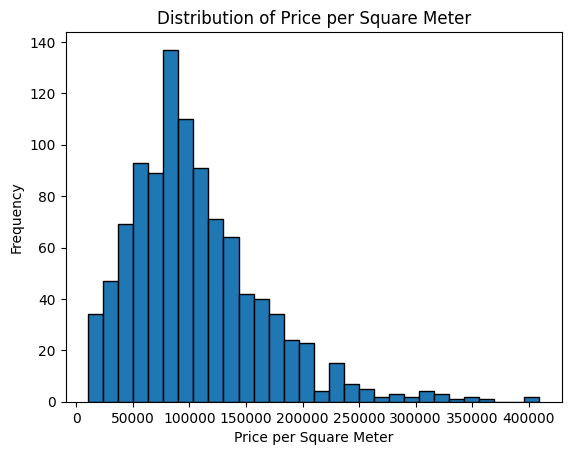

In [262]:
# Histogram price_sqm
plt.hist(data['price_sqm'], bins=30, edgecolor='k')
plt.title("Distribution of Price per Square Meter")
plt.xlabel("Price per Square Meter")
plt.ylabel("Frequency")
plt.show()



##  

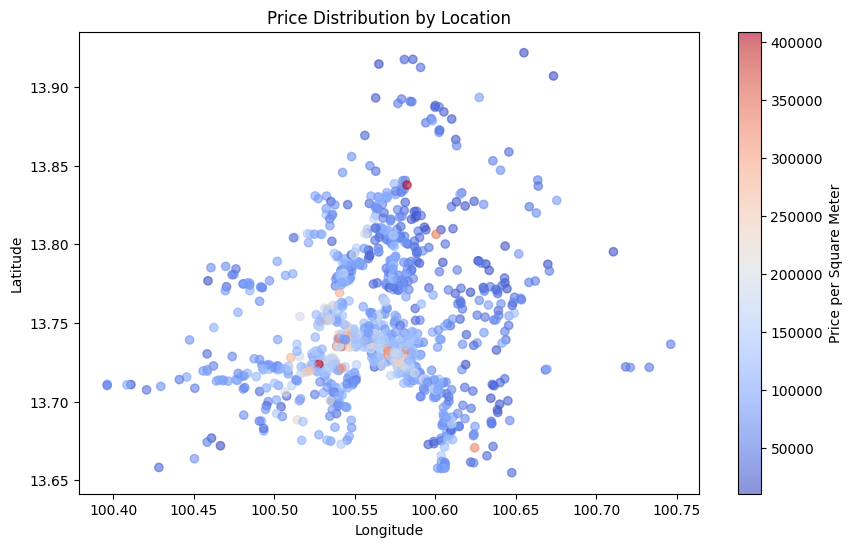

In [263]:
# Scatter plot of location
plt.figure(figsize=(10, 6))
plt.scatter(data['longitude'], data['latitude'],
            c=data['price_sqm'], cmap='coolwarm', alpha=0.6)
plt.colorbar(label='Price per Square Meter')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Price Distribution by Location")
plt.show()

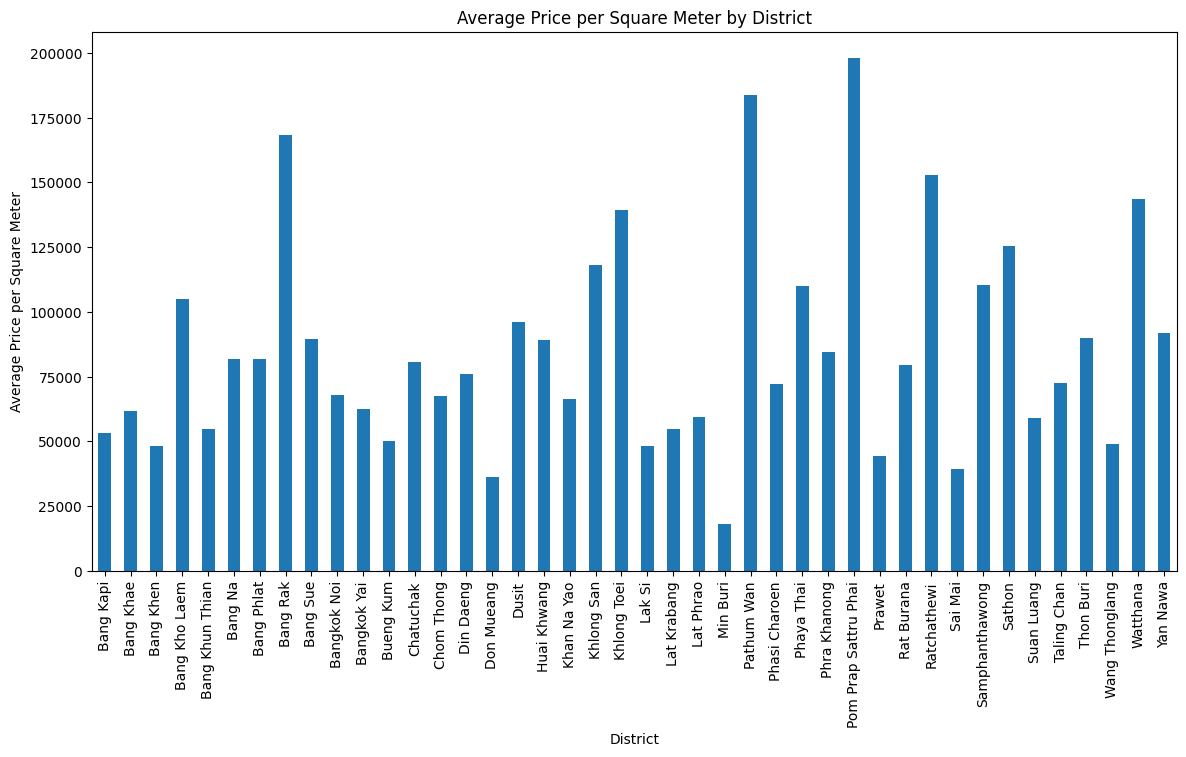

In [264]:
# Bar plot price by district
district_avg_price = data.groupby('district')['price_sqm'].mean()
district_avg_price.plot(kind='bar', figsize=(14, 7))
plt.title("Average Price per Square Meter by District")
plt.xlabel("District")
plt.ylabel("Average Price per Square Meter")
plt.show()

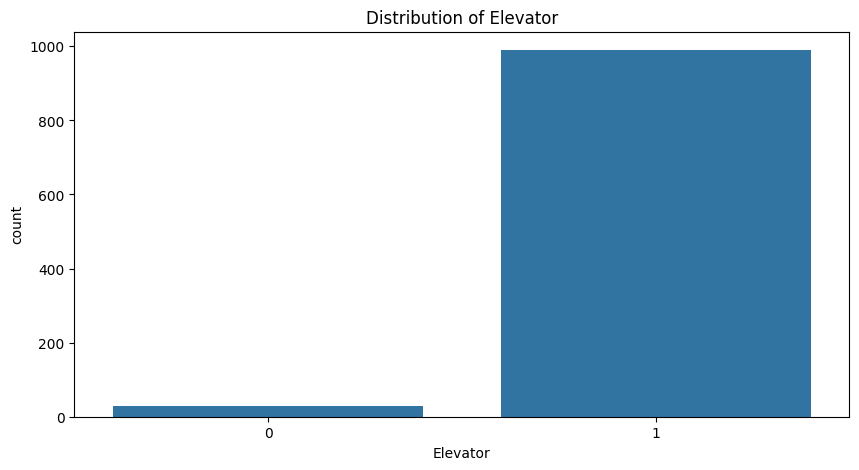

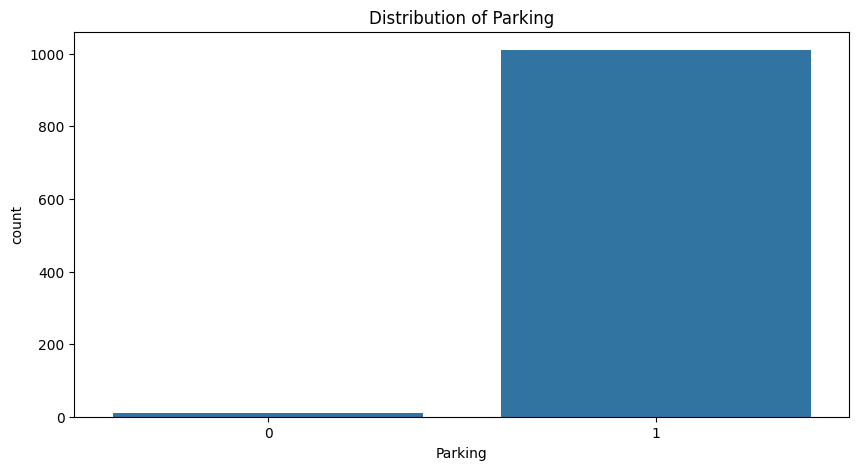

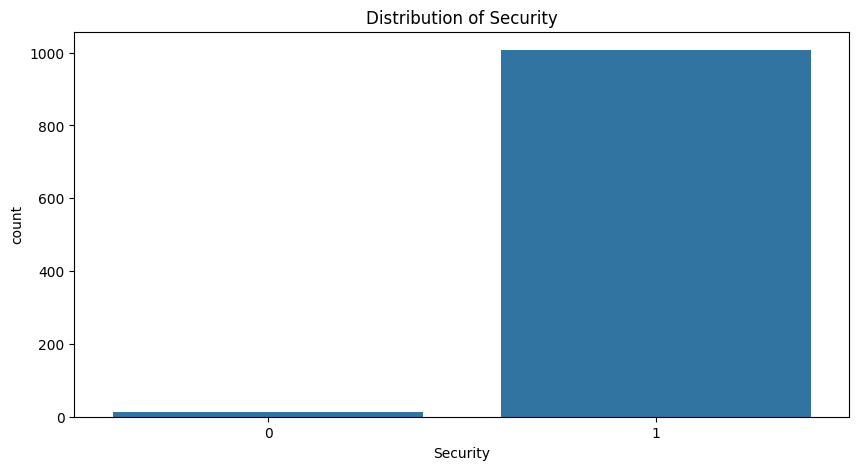

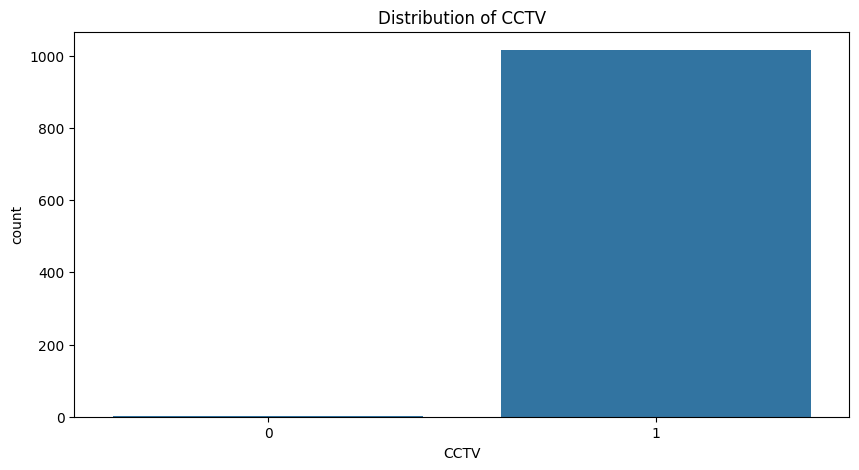

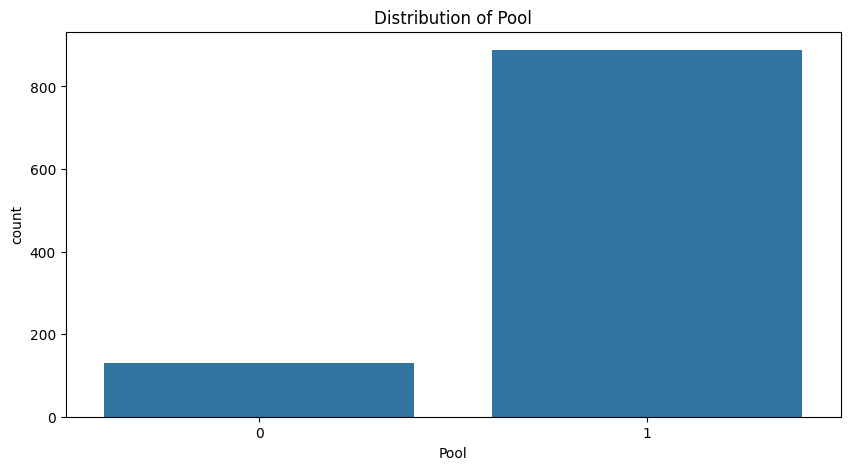

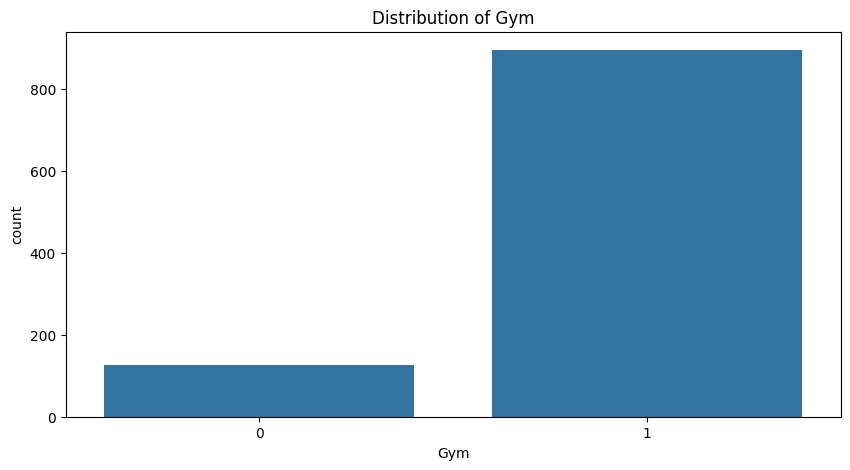

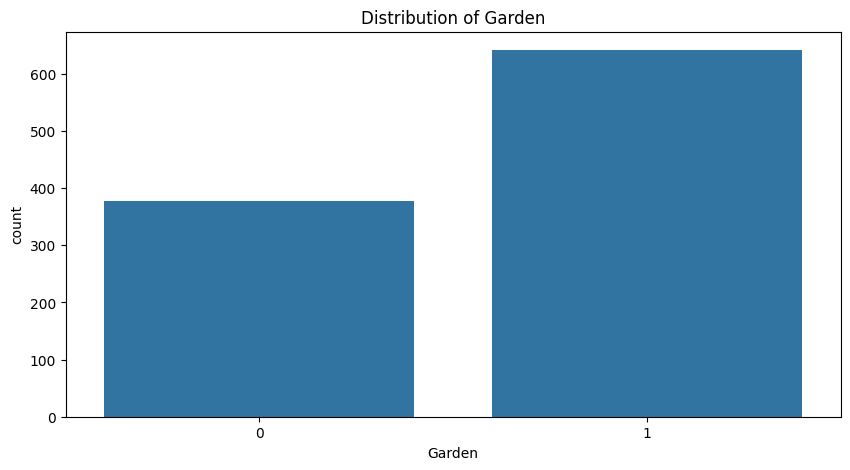

In [265]:
# Count facilities
amenities = ['Elevator', 'Parking', 'Security',
             'CCTV', 'Pool', 'Gym', 'Garden']
for amenity in amenities:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=data[amenity])
    plt.title(f"Distribution of {amenity}")
    plt.show()

## Price by distance

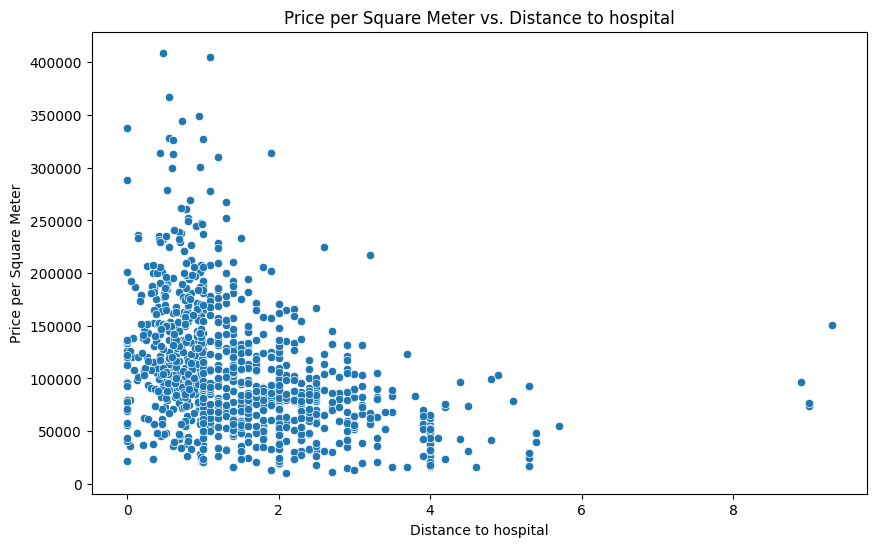

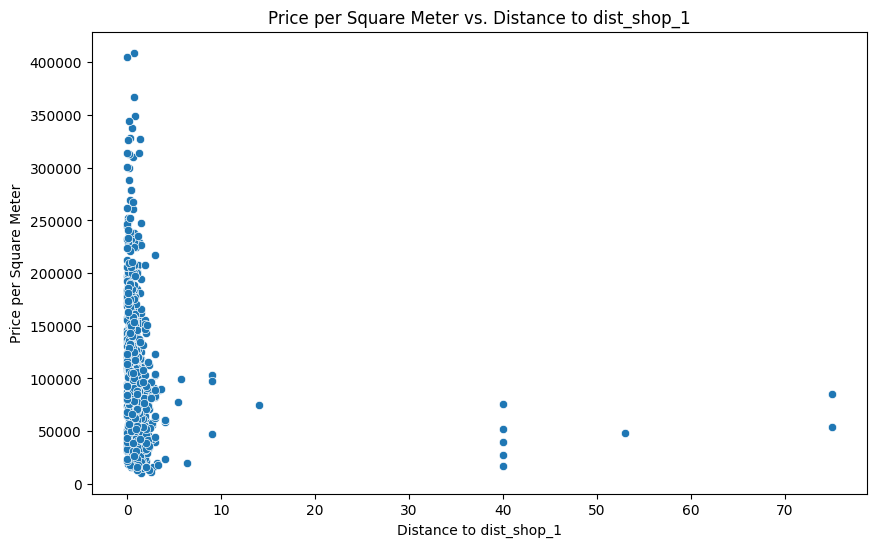

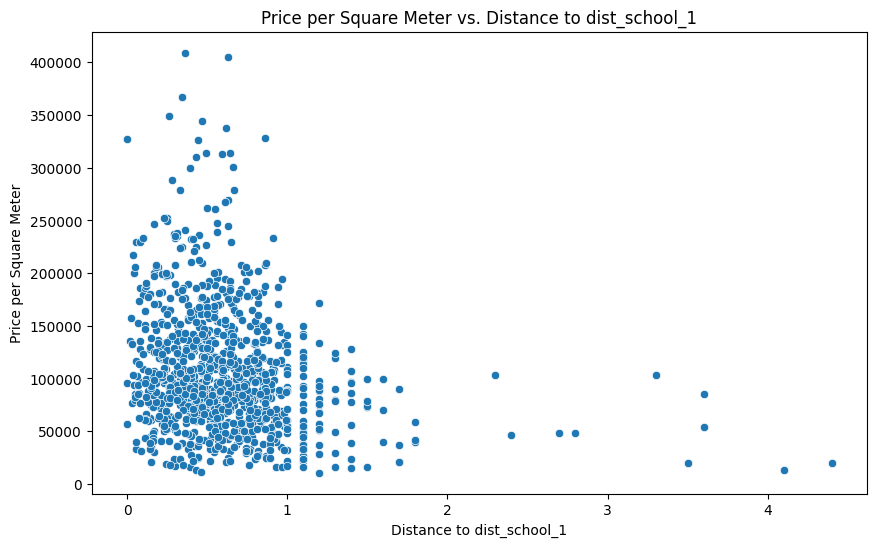

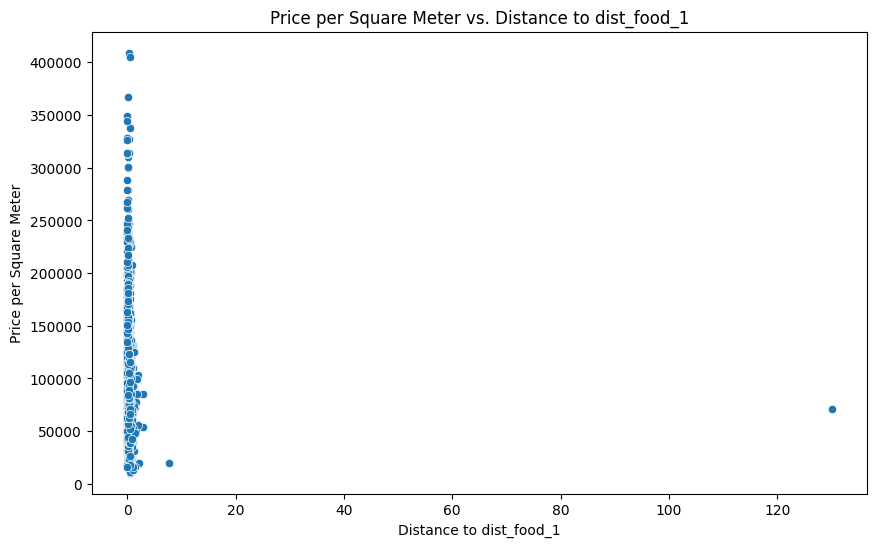

In [266]:
# Scatter plot price by distance
distance_features = ['hospital', 'dist_shop_1', 'dist_school_1', 'dist_food_1']
for feature in distance_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[feature], y=data['price_sqm'])
    plt.title(f"Price per Square Meter vs. Distance to {feature}")
    plt.xlabel(f"Distance to {feature}")
    plt.ylabel("Price per Square Meter")
    plt.show()

In [267]:
# ดูประเภทข้อมูลทั้งหมดและเลือกเฉพาะข้อมูลที่เป็นตัวเลข
numerical_features = data.select_dtypes(include=['int64', 'float64'])
numerical_features.columns

Index(['latitude', 'longitude', 'year_built', 'proj_area', 'nbr_buildings',
       'nbr_floors', 'units', 'hospital', 'price_sqm', 'id', 'bld_age',
       'dist_shop_1', 'dist_shop_2', 'dist_shop_3', 'dist_shop_4',
       'dist_shop_5', 'dist_school_1', 'dist_school_2', 'dist_school_3',
       'dist_school_4', 'dist_school_5', 'dist_food_1', 'dist_food_2',
       'dist_food_3', 'dist_food_4', 'dist_food_5', 'Elevator', 'Parking',
       'Security', 'CCTV', 'Pool', 'Sauna', 'Gym', 'Garden', 'Playground',
       'Shop', 'Restaurant', 'Wifi', 'dist_tran_1', 'dist_tran_2',
       'dist_tran_3', 'dist_tran_4', 'dist_tran_5'],
      dtype='object')

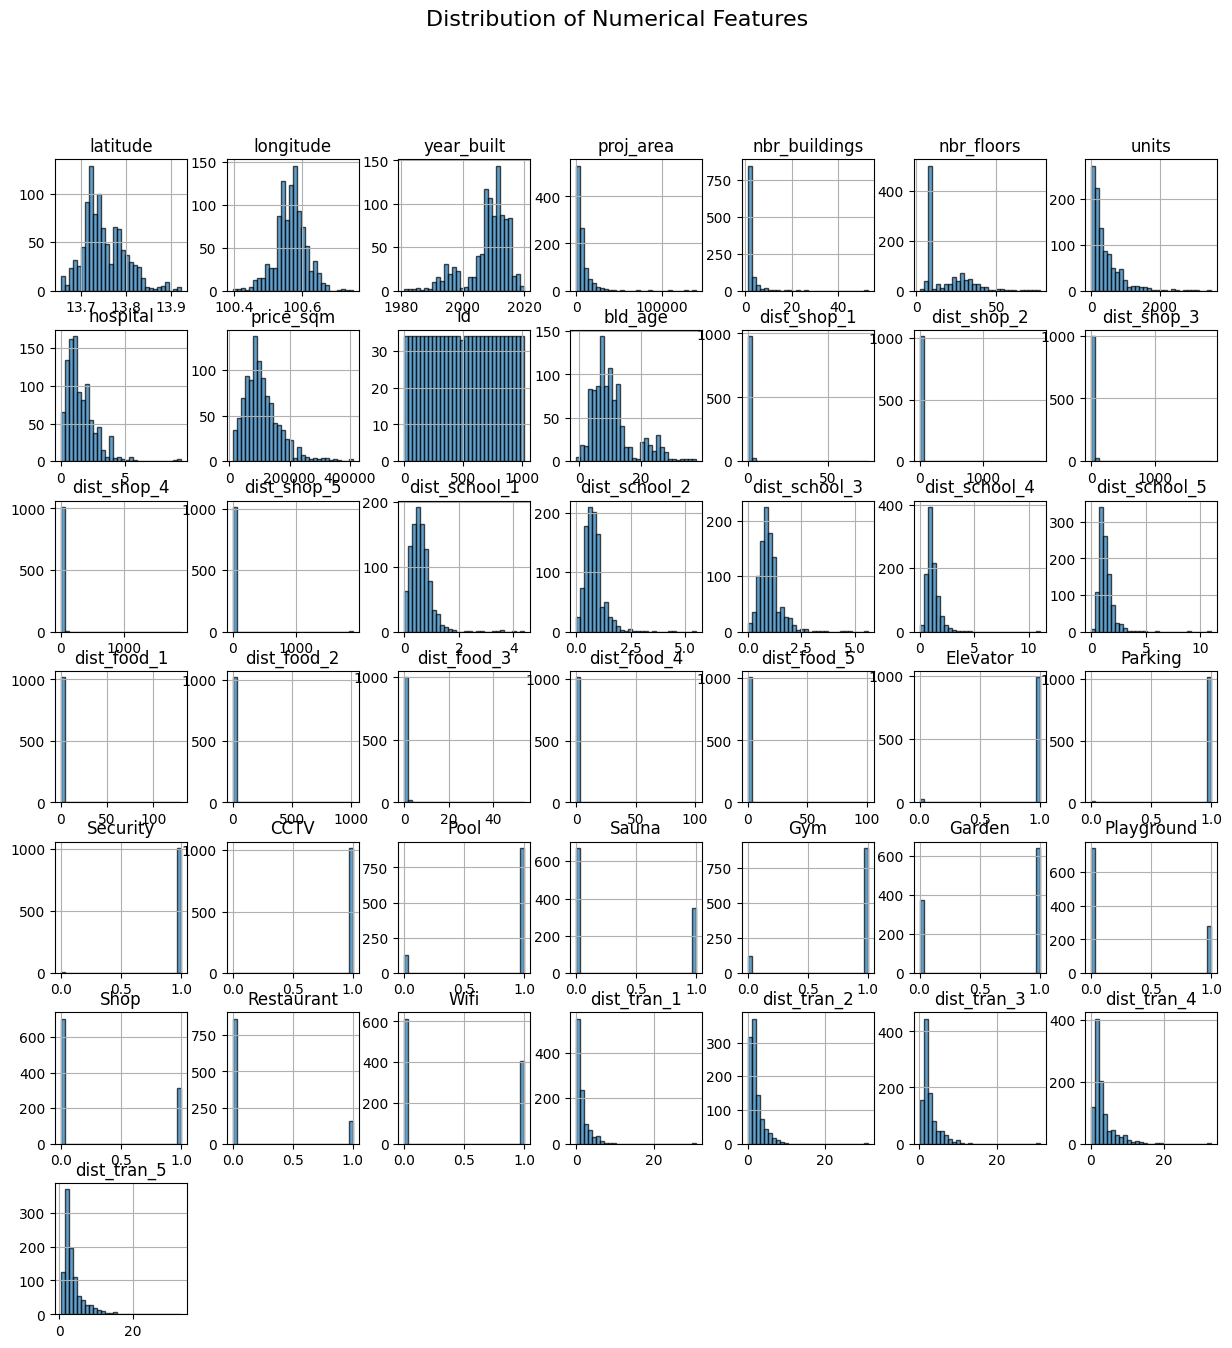

In [268]:
numerical_features.hist(bins=30, figsize=(15, 15), edgecolor='k', alpha=0.7)
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()

In [269]:
numerical_data = data.select_dtypes(include=['int64', 'float64'])

X = numerical_data.drop('price_sqm', axis=1)
y = numerical_data['price_sqm']

# Feature Selection

## from Random Forest model

In [270]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Random Forest Model
model = RandomForestRegressor()
model.fit(X, y)

# sort features by importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
selected_features_tree = feature_importances.nlargest(10).index
print("Selected Features by Tree-Based Model:", selected_features_tree)

Selected Features by Tree-Based Model: Index(['nbr_floors', 'dist_tran_5', 'dist_tran_1', 'year_built', 'bld_age',
       'dist_tran_2', 'hospital', 'latitude', 'longitude', 'units'],
      dtype='object')


## from Linear model

In [271]:
# สร้างโมเดล Linear Regression สำหรับใช้ใน RFE
model = LinearRegression()
# เลือกจำนวน feature ที่ต้องการ เช่น 10
rfe = RFE(model, n_features_to_select=10)

# ฟิตโมเดลกับข้อมูล
X_rfe = rfe.fit_transform(X, y)

# แสดง features ที่ถูกเลือก
selected_features_rfe = X.columns[rfe.get_support()]
print("Selected Features by RFE:", selected_features_rfe)

Selected Features by RFE: Index(['latitude', 'longitude', 'year_built', 'bld_age', 'dist_school_3',
       'Elevator', 'Parking', 'Security', 'CCTV', 'Sauna'],
      dtype='object')


# Train Model

### Random Forest 

In [272]:
# สร้างข้อมูลใหม่จาก features ที่เลือก
X_selected = X[selected_features_tree]

# แบ่งข้อมูล train และ test
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42)

# รายชื่อโมเดลที่ต้องการทดลอง
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "Support Vector Regression": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Neural Network": MLPRegressor(max_iter=500),
    "AdaBoost Regressor": AdaBoostRegressor(),
}

# ทำการเทรนโมเดลแต่ละตัวและประเมินผลลัพธ์
results = {}
for model_name, model in models.items():
    # เทรนโมเดล
    model.fit(X_train, y_train)
    # ทำนายผลบน test set
    y_pred = model.predict(X_test)

    # คำนวณ metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # เก็บผลลัพธ์
    results[model_name] = {
        "MAE": mae,
        "MSE": mse,
        "R-squared": r2
    }

# แสดงผลลัพธ์
results_df = pd.DataFrame(results).T
results_df.sort_values(by="R-squared", ascending=False, inplace=True)
print(results_df)

                                    MAE           MSE  R-squared
Random Forest              21498.015294  9.020507e+08   0.713145
XGBoost                    22887.374981  1.015215e+09   0.677158
Gradient Boosting          22789.921133  1.021374e+09   0.675200
Ridge Regression           26757.507245  1.408220e+09   0.552182
Linear Regression          26777.561186  1.417618e+09   0.549193
Decision Tree              29531.161765  1.725321e+09   0.451342
K-Nearest Neighbors        33175.053922  1.893290e+09   0.397928
AdaBoost Regressor         35885.442772  1.943370e+09   0.382002
Neural Network             41461.314596  2.821191e+09   0.102852
Support Vector Regression  43174.754314  3.292697e+09  -0.047088


c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


### RFE

In [273]:
# แบ่งข้อมูล train และ test
import pandas as pd
X_train, X_test, y_train, y_test = train_test_split(
    X_rfe, y, test_size=0.2, random_state=42)

# รายชื่อโมเดลที่ต้องการทดลอง
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "Support Vector Regression": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Neural Network": MLPRegressor(max_iter=500),
    "AdaBoost Regressor": AdaBoostRegressor(),
}

# ทำการเทรนโมเดลแต่ละตัวและประเมินผลลัพธ์
results = {}
for model_name, model in models.items():
    # เทรนโมเดล
    model.fit(X_train, y_train)
    # ทำนายผลบน test set
    y_pred = model.predict(X_test)

    # คำนวณ metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # เก็บผลลัพธ์
    results[model_name] = {
        "MAE": mae,
        "MSE": mse,
        "R-squared": r2
    }

# แสดงผลลัพธ์
results_df = pd.DataFrame(results).T
results_df.sort_values(by="R-squared", ascending=False, inplace=True)
print(results_df)

                                    MAE           MSE  R-squared
Gradient Boosting          24554.031225  1.121882e+09   0.643238
Random Forest              24982.121716  1.179292e+09   0.624981
XGBoost                    26999.153359  1.565480e+09   0.502172
Ridge Regression           34199.828287  1.974806e+09   0.372006
Linear Regression          34004.774510  1.985044e+09   0.368750
AdaBoost Regressor         37155.557727  1.999325e+09   0.364208
K-Nearest Neighbors        37069.458824  2.286690e+09   0.272825
Neural Network             43533.707266  3.115755e+09   0.009180
Decision Tree              36057.274510  3.289380e+09  -0.046033
Support Vector Regression  43176.073192  3.292916e+09  -0.047158


c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [274]:
# สมมติว่าเราต้องการใช้โมเดลที่ดีที่สุดจากผลลัพธ์
# เลือกโมเดลที่ให้ค่า R-squared สูงสุดจากผลลัพธ์ที่เราได้จากการทดลองโมเดล
best_model_name = results_df.index[0]  # เลือกโมเดลที่ R-squared สูงสุด
best_model = models[best_model_name]

best_model_name

'Gradient Boosting'

In [275]:
selected_features_tree

Index(['nbr_floors', 'dist_tran_5', 'dist_tran_1', 'year_built', 'bld_age',
       'dist_tran_2', 'hospital', 'latitude', 'longitude', 'units'],
      dtype='object')

In [276]:
from imblearn.over_sampling import RandomOverSampler

# ใช้ RandomOverSampler สำหรับ Resampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# แสดงขนาดข้อมูลหลังการ Resampling
print("Original data shape:", X_train.shape)
print("Resampled data shape:", X_resampled.shape)

Original data shape: (815, 10)
Resampled data shape: (3148, 10)


### Train Random Forest after resampling

In [277]:
# เทรนโมเดลใหม่โดยใช้ข้อมูล Resampled
# สมมติว่าได้ X_resampled และ y_resampled จากการ Resampling ข้อมูลแล้ว

# แบ่งข้อมูล test set ใหม่จากข้อมูลที่ไม่ได้ผ่าน Resampling
X_train_resampled, X_test, y_train_resampled, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42)

# รายชื่อโมเดลที่ต้องการทดลอง
models = {
    # Linear Models
    "Ridge Regression": Ridge(),

    # Tree-Based Models
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),

    # Support Vector Machines
    "Support Vector Regression": SVR(),

    # Nearest Neighbors
    "K-Nearest Neighbors": KNeighborsRegressor(),

    # Neural Networks
    "Neural Network": MLPRegressor(max_iter=500),

    # Ensemble Models
    "AdaBoost Regressor": AdaBoostRegressor(),
}

# ทำการเทรนโมเดลแต่ละตัวและประเมินผลลัพธ์
results = {}
for model_name, model in models.items():
    # เทรนโมเดล
    model.fit(X_train_resampled, y_train_resampled)
    # ทำนายผลบน test set
    y_pred = model.predict(X_test)

    # คำนวณ metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # เก็บผลลัพธ์
    results[model_name] = {
        "MAE": mae,
        "MSE": mse,
        "R-squared": r2
    }

# แสดงผลลัพธ์
results_df = pd.DataFrame(results).T
results_df.sort_values(by="R-squared", ascending=False, inplace=True)
print(results_df)

                                    MAE           MSE  R-squared
XGBoost                     2485.942984  2.369246e+07   0.993164
Random Forest               3368.943238  3.671625e+07   0.989407
Decision Tree               1925.893651  2.444765e+08   0.929464
Gradient Boosting          20280.014834  9.934084e+08   0.713382
K-Nearest Neighbors        23650.486984  1.153792e+09   0.667108
AdaBoost Regressor         40766.531366  2.205771e+09   0.363591
Ridge Regression           35868.653002  2.521003e+09   0.272640
Neural Network             44371.420736  3.382339e+09   0.024127
Support Vector Regression  43192.152330  3.591085e+09  -0.036100


c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [278]:
# สมมติว่า X และ y เป็นข้อมูลดั้งเดิมที่มี target และ selected_features_rfe คือรายการ features ที่เลือกด้วย RFE
X_rfe = X[selected_features_rfe]  # เลือกเฉพาะ features ที่ได้จาก RFE

# ทำการ Resampling โดยใช้ RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_rfe, y)

# แบ่งข้อมูล train และ test
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42)

# รายชื่อโมเดลที่ต้องการทดลอง
models = {
    # Linear Models
    "Ridge Regression": Ridge(),

    # Tree-Based Modelsa
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),

    # Support Vector Machines
    "Support Vector Regression": SVR(),

    # Nearest Neighbors
    "K-Nearest Neighbors": KNeighborsRegressor(),

    # Neural Networks
    "Neural Network": MLPRegressor(max_iter=500),

    # Ensemble Models
    "AdaBoost Regressor": AdaBoostRegressor(),
}

# ทำการเทรนโมเดลแต่ละตัวและประเมินผลลัพธ์
results = {}
for model_name, model in models.items():
    # เทรนโมเดล
    model.fit(X_train, y_train)
    # ทำนายผลบน test set
    y_pred = model.predict(X_test)

    # คำนวณ metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # เก็บผลลัพธ์
    results[model_name] = {
        "MAE": mae,
        "MSE": mse,
        "R-squared": r2
    }

# แสดงผลลัพธ์
results_df = pd.DataFrame(results).T
results_df.sort_values(by="R-squared", ascending=False, inplace=True)
print(results_df)

c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


                                    MAE           MSE  R-squared
Decision Tree                422.665813  1.680265e+07   0.995086
XGBoost                     3598.052688  3.999960e+07   0.988301
Random Forest               3326.929117  4.248384e+07   0.987575
Gradient Boosting          19485.731916  7.783178e+08   0.772361
K-Nearest Neighbors        23377.109859  1.083634e+09   0.683064
AdaBoost Regressor         38550.941310  2.033774e+09   0.405171
Ridge Regression           36572.787487  2.264553e+09   0.337674
Neural Network             43951.022454  3.275733e+09   0.041929
Support Vector Regression  42982.478586  3.490056e+09  -0.020755


## Test model with features input

In [279]:
best_model_name = results_df.index[0]  # เลือกโมเดลที่ R-squared สูงสุด
best_model = models[best_model_name]
print(best_model_name)

Decision Tree


In [280]:
# เลือกโมเดลที่ดีที่สุดจากตารางผลลัพธ์ โดยดูจากค่า R-squared สูงสุด
best_model_name = results_df.index[0]  # โมเดลที่มี R-squared สูงสุด
best_model = models[best_model_name]

# เตรียมข้อมูลใหม่ที่มีเฉพาะ features ที่เลือกจาก RFE
# ข้อมูลตัวอย่าง (อาจใส่ค่าจริงที่ต้องการทำนาย)
new_data = pd.DataFrame({
    'latitude': [13.755980],       # ตัวอย่างค่า latitude
    'longitude': [100.501875],     # ตัวอย่างค่า longitude
    'year_built': [2015],        # ตัวอย่างค่า year_built
    'bld_age': [8],              # ตัวอย่างค่าอายุอาคาร
    'dist_school_3': [100],      # ตัวอย่างระยะทางถึงโรงเรียน 3
    'Elevator': [0],             # มีลิฟต์หรือไม่ (1 = มี, 0 = ไม่มี)
    'Parking': [0],              # มีที่จอดรถหรือไม่ (1 = มี, 0 = ไม่มี)
    'Security': [0],             # มีระบบรักษาความปลอดภัยหรือไม่
    'CCTV': [0],                 # มีกล้องวงจรปิดหรือไม่
    'Sauna': [0]                 # มีห้องซาวน่าหรือไม่ (1 = มี, 0 = ไม่มี)
})

# ใช้โมเดลที่ดีที่สุดเพื่อทำนายราคาบ้านหรือคอนโด
predicted_price = best_model.predict(new_data)

# แสดงผลลัพธ์การทำนาย
print(f"The predicted price per square meter is: {predicted_price[0]}")

The predicted price per square meter is: 187647.0
